In [16]:
# Importando todas as bibliotecas necessárias:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt

# Importando todas as bibliotecas necessárias Scikit Learn:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [17]:
# Definindo a quantidade de simbolos:
N = 1000000

In [18]:
# Instânciando o Naive Bayes:
gnb_re = GaussianNB()
gnb_im = GaussianNB()

In [19]:
# Criando o vetor e Es/N0:
EsN0dB = np.arange(-2, 22, 2)

In [20]:
# Criando a SER simulada e teórica:
ser_sim = np.zeros(len(EsN0dB))
ser_teo = np.zeros(len(EsN0dB))

In [21]:
for idx in range(0, len(EsN0dB)):

  # Printando os valores encontrados:
  print('Es/N0 dB: ', EsN0dB[idx])

  EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))

  # Gerando os simbolos:
  x = (2.0 * (np.random.rand(N, 1) >= 0.5) - 1.0) + 1j*(2.0 * (np.random.rand(N, 1) >=
0.5) - 1.0)
  
  # Normalizando a energia para 1:
  s = (1/np.sqrt(2)) * x;

  # Gerando o vetor de ruído:
  noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))

  # Passando os simbolos pelo canal AWGN:
  y = s + np.sqrt(EsN0Lin)*noise

  # Fazendo a divisão em treinamento e teste dos reais:
  x_real_test, x_real_train, y_real_test, y_real_train = train_test_split(x.real, y.real)

  # Fazendo a divisão em treinamento e teste dos imaginários: 
  x_imag_test, x_imag_train, y_imag_test, y_imag_train = train_test_split(x.imag, y.imag)

  # Treinando a parte real:
  gnb_re.fit(y_real_train, x_real_train.ravel())

  # Treinando a parte imaginaria:
  gnb_im.fit(y_imag_train, x_imag_train.ravel())

  # Predição para a parte real:
  y_pred_real = (gnb_re.predict(y_real_test)).reshape(len(y_real_test), 1)
  
  # Predição para a parte imaginária:
  y_pred_imag = (gnb_im.predict(y_imag_test )).reshape(len(y_imag_test), 1)

  # Simulação QPSK BER:
  err_real = (x_real_test != y_pred_real)
  err_imag = (x_imag_test != y_pred_imag)

  err = 0

  for i in range(0, len(x_real_test)):
    if(err_real[i] == True or err_imag[i] == True):
      err =+ err 

  # SER Simulada:
  ser_sim[idx] = 1.0 * err / N
  
  # SER Teórica:
  ser_teo[idx] = erfc( np.sqrt( 0.5*(10.0**(EsN0dB[idx]/10.0)) ) ) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0

  # Imprimindo os resultados:
  print('Error = {:.2f}'.format(ser_teo[idx] - ser_sim[idx]))


Es/N0 dB:  -2
Error = 0.38
Es/N0 dB:  0
Error = 0.29
Es/N0 dB:  2
Error = 0.20
Es/N0 dB:  4
Error = 0.11
Es/N0 dB:  6
Error = 0.05
Es/N0 dB:  8
Error = 0.01
Es/N0 dB:  10
Error = 0.00
Es/N0 dB:  12
Error = 0.00
Es/N0 dB:  14
Error = 0.00
Es/N0 dB:  16
Error = 0.00
Es/N0 dB:  18
Error = 0.00
Es/N0 dB:  20
Error = 0.00


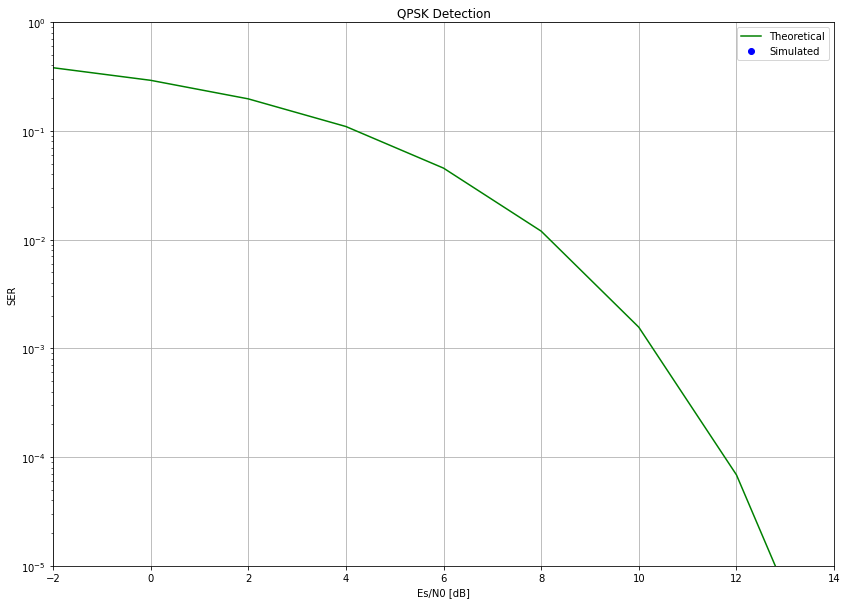

In [22]:
# Plot Es/N0 versus SER values.
fig = plt.figure(figsize=(14,10))
plt.plot(EsN0dB, ser_teo, 'g', label='Theoretical')
plt.plot(EsN0dB, ser_sim, 'bo', label='Simulated')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('SER')
plt.grid(True)
plt.title('QPSK Detection')
plt.legend()
plt.xlim([-2, 14])
plt.ylim([1e-5, 1])
plt.show()
